In [1]:
import os
import sys

#### VP Tree

sys.path.append(os.getcwd() + "/vp_trees_cpp/vp_trees_cpp")

from vp_tree import FS_metric
from vp_tree import tree_container

from utilities.load_trajectory import load_trajectory
from utilities.utilities.fubini_study import FS_metric

import time

## load trajectory data from file
import pickle

## diffusion maps
from diffusion_maps import run_diffusion_map
from diffusion_maps import run_diffusion_map_dense

## numerical
import numpy as np
from numpy import linalg as la

## plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [2]:
Ntraj,duration,traj_data,traj_expects = load_trajectory("absorptive_bistable")

In [3]:
num_data_points = len(traj_data)

In [19]:
def run_diff_map(num_sample_points = 1000,
                 num_neighbors = 200,
                 obs_indices = range(3),
                 color_by_percentile = True,
                 params = params,
                 sample_type = 'last_n'):
    
    ## sampling scheme
    if sample_type == 'uniform_time':
        downsample_rate = num_data_points / num_sample_points
        sample_indices = range(num_data_points)[::downsample_rate]
    elif sample_type == 'uniform_random':
        sample_indices = random.sample(range(num_data_points),num_sample_points)
    elif sample_type == 'first_n':
        sample_indices = range(num_sample_points)
    elif sample_type == 'last_n':
        sample_indices = range(num_data_points - num_sample_points, num_data_points)
    else:
        raise ValueError("unknown sample_type")
    
    ## sample points
    points = [traj_data[i] for i in sample_indices]
    
    ## Params for sparse diffusion map
    params = {"gaussian_epsilon": 0.5,
              "alpha" : 0.5,
              "eigen_dims": 7,
              "num_neighbors": num_neighbors,
             }
    
    ## diffusion map
    return run_diffusion_map(points, 
                             params, 
                             symmetric = True, 
                             metric = "FS_metric",
                             neighbor_selection = "num_neighbors",
                             eig_vec_both_sides = False, 
                             return_eigenvectors = True)

In [27]:
num_sample_points_list = [500,1000,1500,2000,3000,5000,10000]
num_neighbors_list = [100,200,300]

In [25]:
times = {}
for num_sample_points in num_sample_points_list:
    for num_neighbors in num_neighbors_list:
        t0 = time.time()
        run_diff_map(num_sample_points = num_sample_points, num_neighbors = num_neighbors)
        times[num_sample_points,num_neighbors] = time.time() - t0

using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  


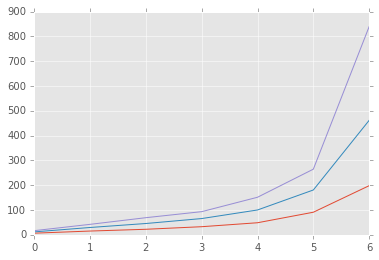

In [30]:
for num_neighbors in num_neighbors_list:
    plt.plot([times[num_sample_points,num_neighbors] 
                  for num_sample_points 
                      in num_sample_points_list ])